In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)

In [3]:
df.dtypes

temp    float64
q       float64
dtype: object

In [4]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\min\anaconda3\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [5]:
df.head()

,temp,q
date,,
2006-01-01,-0.3,1.492
2006-01-02,-1.0,0.000
2006-01-03,-3.3,6.803
2006-01-04,-6.8,6.414
2006-01-05,-8.8,6.626


In [7]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=5844, freq=None)

In [8]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=5844, freq='D')

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 365
alpha = 2/(span+1)

In [10]:
df['EWMA365'] = df['q'].ewm(alpha=alpha,adjust=True).mean()
df['SES365']=SimpleExpSmoothing(df['q']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,temp,q,EWMA365,SES365
date,,,,
2006-01-01,-0.3,1.492,1.492000,1.492000
2006-01-02,-1.0,0.000,0.743956,1.483847
2006-01-03,-3.3,6.803,2.774714,1.512913
2006-01-04,-6.8,6.414,3.692027,1.539695
2006-01-05,-8.8,6.626,4.285270,1.567489


In [11]:
np.asarray(df)

array([[-0.3       ,  1.492     ,  1.492     ,  1.492     ],
       [-1.        ,  0.        ,  0.74395616,  1.48384699],
       [-3.3       ,  6.803     ,  2.77471427,  1.5129134 ],
       ...,
       [ 0.3       ,  6.961     , 50.64843912, 50.64843912],
       [-3.6       ,  6.997     , 50.40990667, 50.40990667],
       [-7.7       ,  7.022     , 50.17281428,         nan]])

In [31]:
train_data=df.iloc[:4383]
test_data=df.iloc[4383:]

In [32]:
test_data

,temp,q,EWMA365,SES365
date,,,,
2018-01-01,-5.9,2.703,59.146895,59.146895
2018-01-02,-4.2,2.793,58.838951,58.838951
2018-01-03,-7.5,2.894,58.533241,58.533241
2018-01-04,-6.4,0.000,58.213387,58.213387
2018-01-05,-4.5,0.000,57.895281,57.895281
2018-01-06,-6.8,8.841,57.627225,57.627225
2018-01-07,-4.4,3.292,57.330311,57.330311
2018-01-08,0.4,0.000,57.017030,57.017030
2018-01-09,-4.9,3.462,56.724380,56.724380


In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['q'],trend='additive',seasonal='additive',seasonal_periods=365).fit()

In [41]:
test_predictions = fitted_model.forecast(1461).rename('HW Forecast')

In [42]:
test_predictions

2018-01-01      2.463815
2018-01-02      2.317176
2018-01-03      1.100511
2018-01-04      5.895609
2018-01-05     -0.616731
2018-01-06     -2.330665
2018-01-07      4.205794
2018-01-08      2.778633
2018-01-09      7.418919
2018-01-10      4.667135
2018-01-11      5.823080
2018-01-12      6.710566
2018-01-13     12.352726
2018-01-14      8.572515
2018-01-15     12.380433
2018-01-16     12.503384
2018-01-17     15.843194
2018-01-18     18.008473
2018-01-19     14.910479
2018-01-20     17.230785
2018-01-21     18.230479
2018-01-22     15.014331
2018-01-23     15.203621
2018-01-24     14.257912
2018-01-25     15.371527
2018-01-26     16.327438
2018-01-27     14.722347
2018-01-28     15.405952
2018-01-29     15.466918
2018-01-30     13.406480
                 ...    
2021-12-02    628.348145
2021-12-03    619.667772
2021-12-04    615.643768
2021-12-05    610.709019
2021-12-06    610.567739
2021-12-07    610.663764
2021-12-08    610.183823
2021-12-09    612.563053
2021-12-10    611.898126


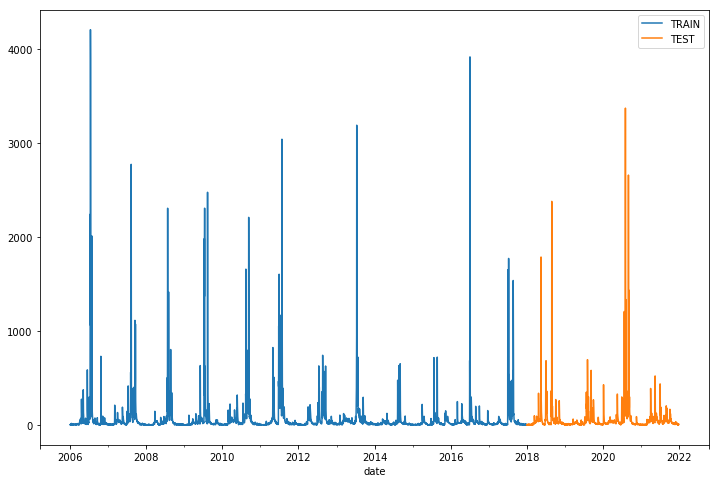

In [43]:
train_data['q'].plot(legend=True,label='TRAIN')
test_data['q'].plot(legend=True,label='TEST',figsize=(12,8));

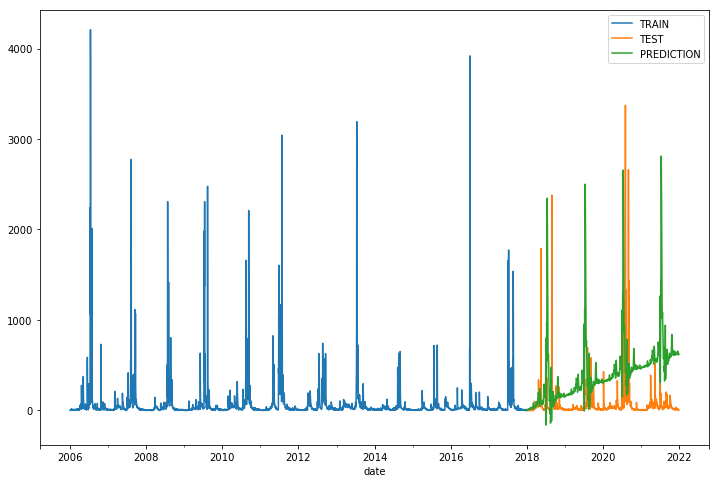

In [18]:
train_data['q'].plot(legend=True,label='TRAIN')
test_data['q'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

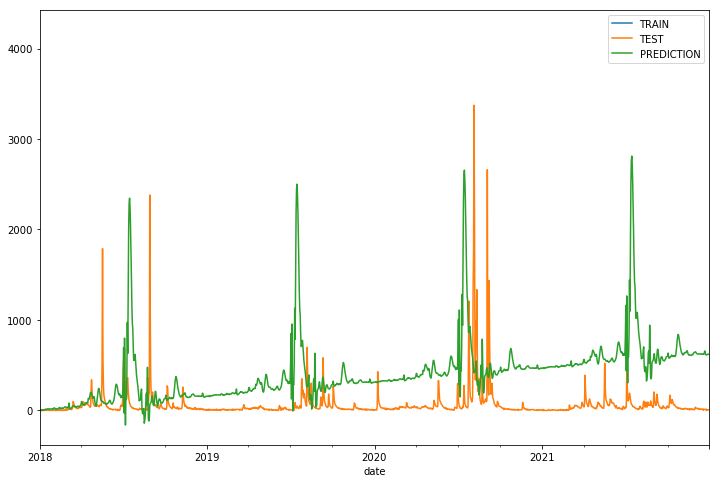

In [20]:
train_data['q'].plot(legend=True,label='TRAIN')
test_data['q'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2018-01-01','2021-12-31']);

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
mean_absolute_error(test_data['q'],test_predictions)

369.87255790075915

In [45]:
mean_squared_error(test_data['q'],test_predictions)

268448.86979283555

In [46]:
np.sqrt(mean_squared_error(test_data['q'],test_predictions))

518.1205166685021

In [47]:
test_data.describe()

,temp,q,EWMA365,SES365
count,1460.000000,1461.000000,1461.000000,1460.000000
mean,11.033493,63.967480,65.124035,65.134276
std,10.235788,190.700739,27.492040,27.498673
min,-16.300000,0.000000,32.039745,32.039745
25%,2.800000,10.789000,44.566992,44.564427
50%,11.000000,23.815000,58.832437,58.835694
75%,20.100000,50.289000,72.076297,72.087116
max,29.700000,3373.140000,163.747929,163.747929
